In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from scipy.stats import norm, pearsonr

import os
import time
import itertools

from glove.model import *

Total samples: 59, Initial regularization: 1.00e-03
Loss: 14.558, Residuals: -0.667
Loss: 10.400, Residuals: -0.168
Loss: 9.208, Residuals: -0.125
Loss: 8.519, Residuals: -0.244
Loss: 7.557, Residuals: -0.238
Loss: 7.501, Residuals: -0.157
Loss: 7.046, Residuals: -0.153
Loss: 6.409, Residuals: -0.144
Loss: 6.204, Residuals: -0.093
Loss: 5.883, Residuals: -0.091
Loss: 5.593, Residuals: -0.074
Loss: 5.573, Residuals: -0.049
Loss: 5.537, Residuals: -0.049
Loss: 5.494, Residuals: -0.044
Loss: 5.480, Residuals: -0.034
Loss: 5.457, Residuals: -0.034
Loss: 5.431, Residuals: -0.036
Loss: 5.405, Residuals: -0.031
Loss: 5.385, Residuals: -0.029
Loss: 5.365, Residuals: -0.029
Loss: 5.360, Residuals: -0.027
Loss: 5.354, Residuals: -0.027
Loss: 5.353, Residuals: -0.025
Loss: 5.352, Residuals: -0.025
Loss: 5.352, Residuals: -0.025
Loss: 5.351, Residuals: -0.025
Loss: 5.351, Residuals: -0.025
Loss: 5.351, Residuals: -0.025
Loss: 5.351, Residuals: -0.025
Loss: 5.351, Residuals: -0.025
Loss: 5.351, Res

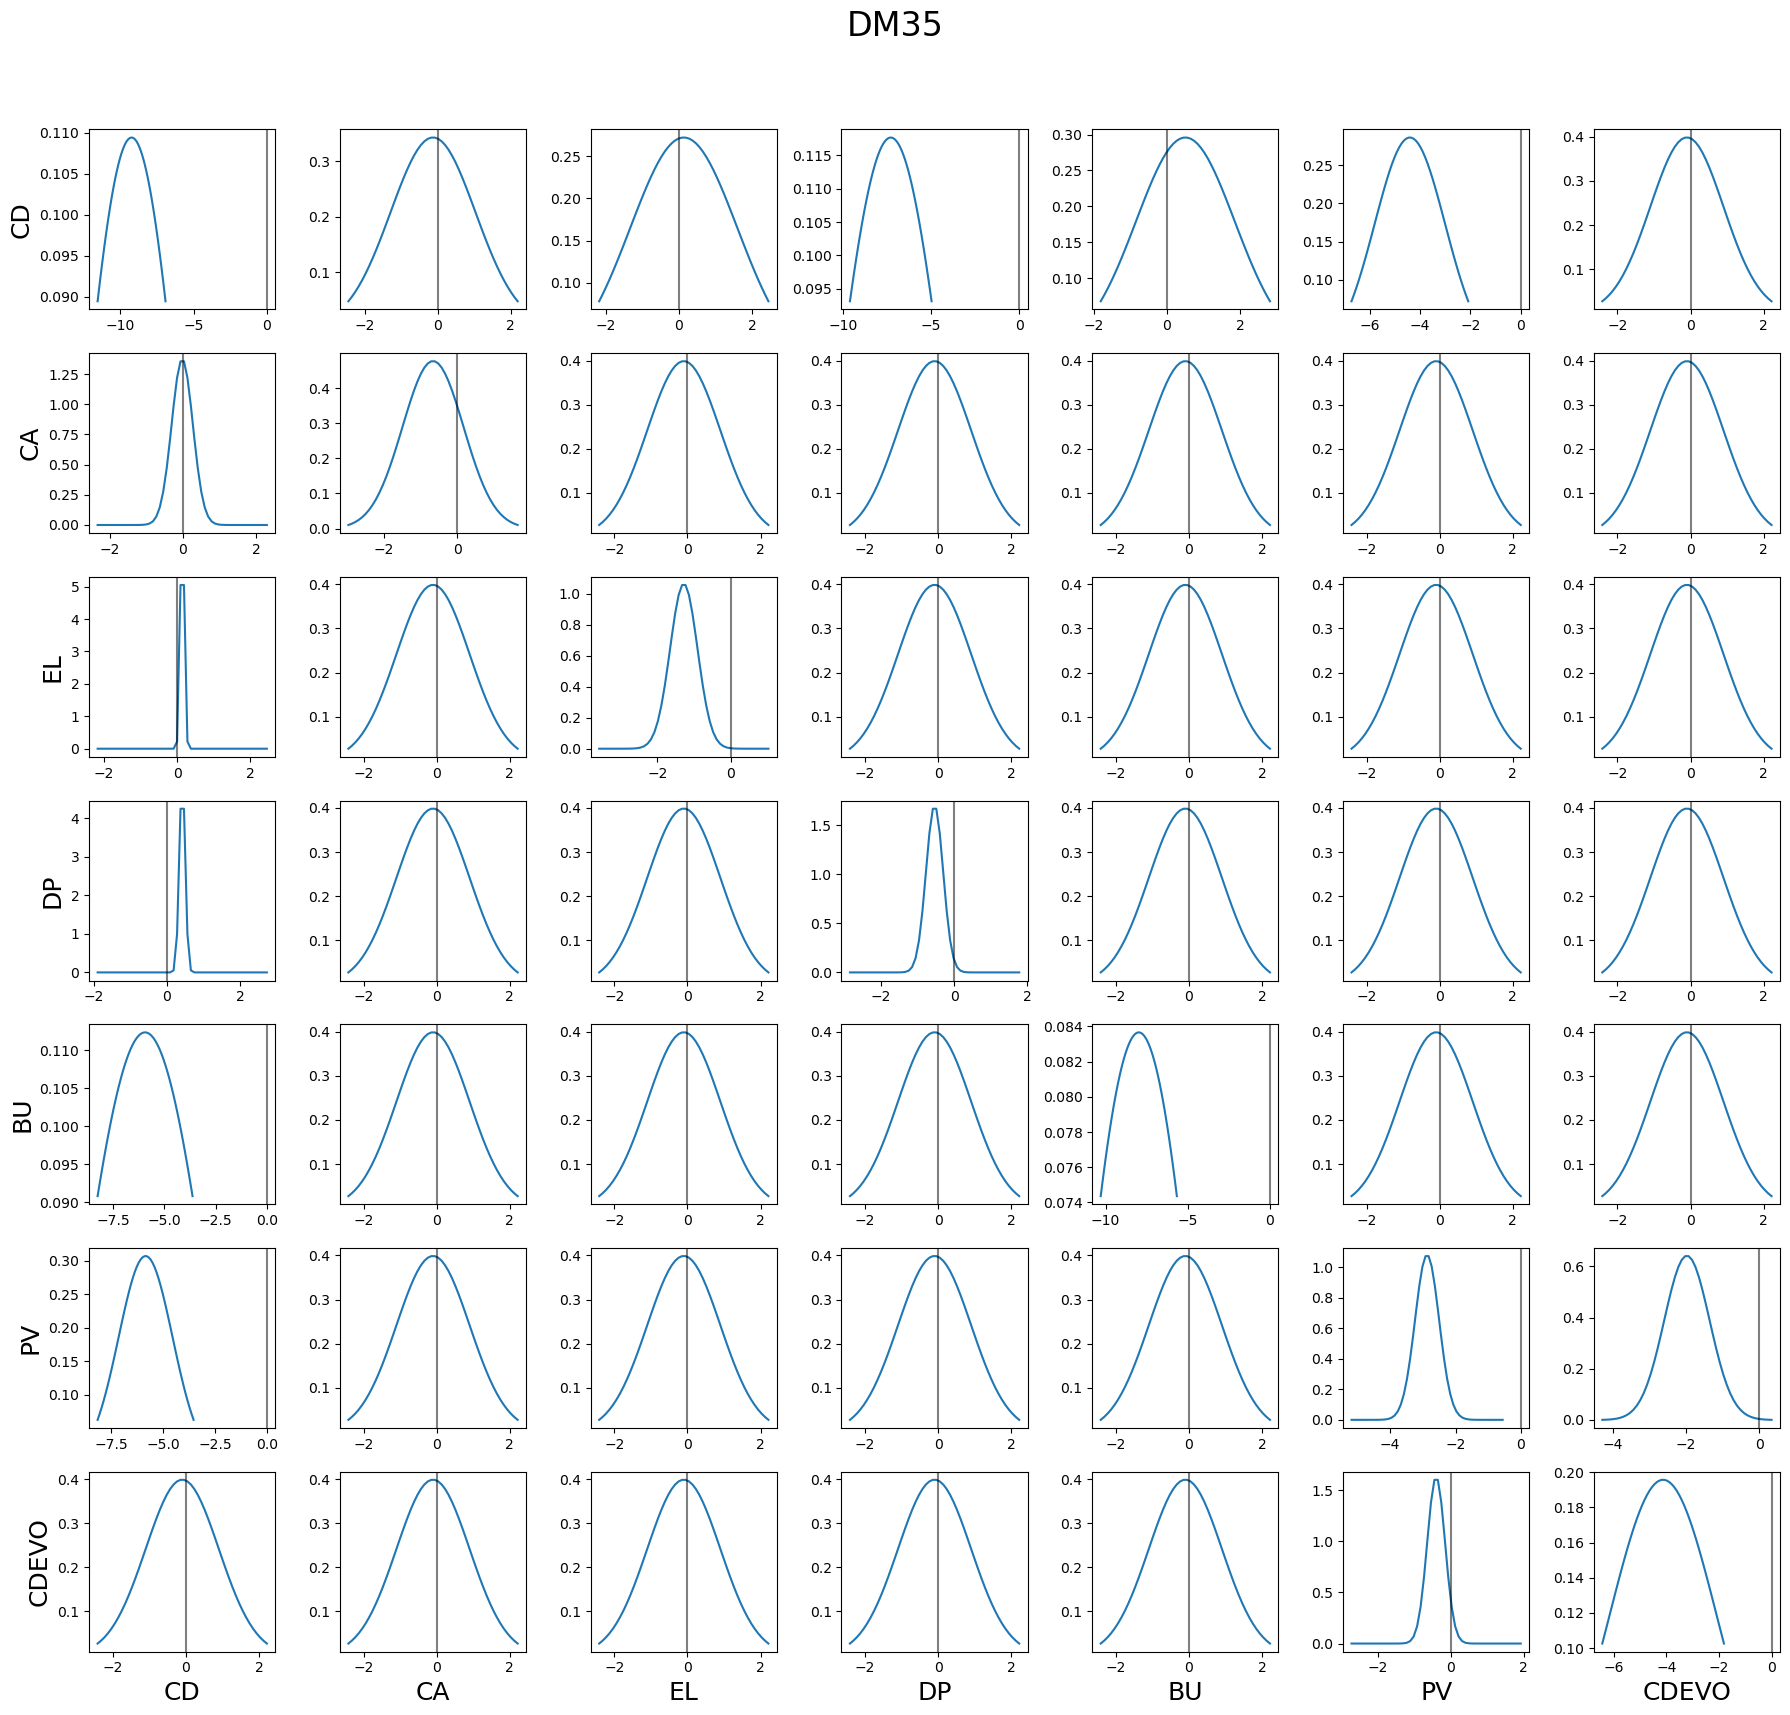

Total samples: 58, Initial regularization: 1.00e-03
Loss: 19.843, Residuals: -1.281
Loss: 13.423, Residuals: -0.245
Loss: 8.683, Residuals: -0.286
Loss: 6.016, Residuals: -0.208
Loss: 5.788, Residuals: -0.091
Loss: 5.376, Residuals: -0.084
Loss: 4.724, Residuals: -0.070
Loss: 3.918, Residuals: -0.053
Loss: 3.870, Residuals: 0.022
Loss: 3.785, Residuals: 0.021
Loss: 3.663, Residuals: 0.017
Loss: 3.616, Residuals: 0.013
Loss: 3.565, Residuals: 0.010
Loss: 3.557, Residuals: 0.013
Loss: 3.552, Residuals: 0.011
Loss: 3.550, Residuals: 0.010
Loss: 3.550, Residuals: 0.010
Loss: 3.550, Residuals: 0.010
Loss: 3.550, Residuals: 0.010
Loss: 3.550, Residuals: 0.010
Loss: 3.550, Residuals: 0.010
Loss: 3.550, Residuals: 0.010
Loss: 3.550, Residuals: 0.010
Evidence -10.116
Updating hyper-parameters...
Total samples: 58, Updated regularization: 1.52e-01
Loss: 91.417, Residuals: -0.001
Loss: 90.916, Residuals: 0.002
Loss: 90.883, Residuals: -0.001
Loss: 90.830, Residuals: -0.000
Loss: 90.800, Residuals

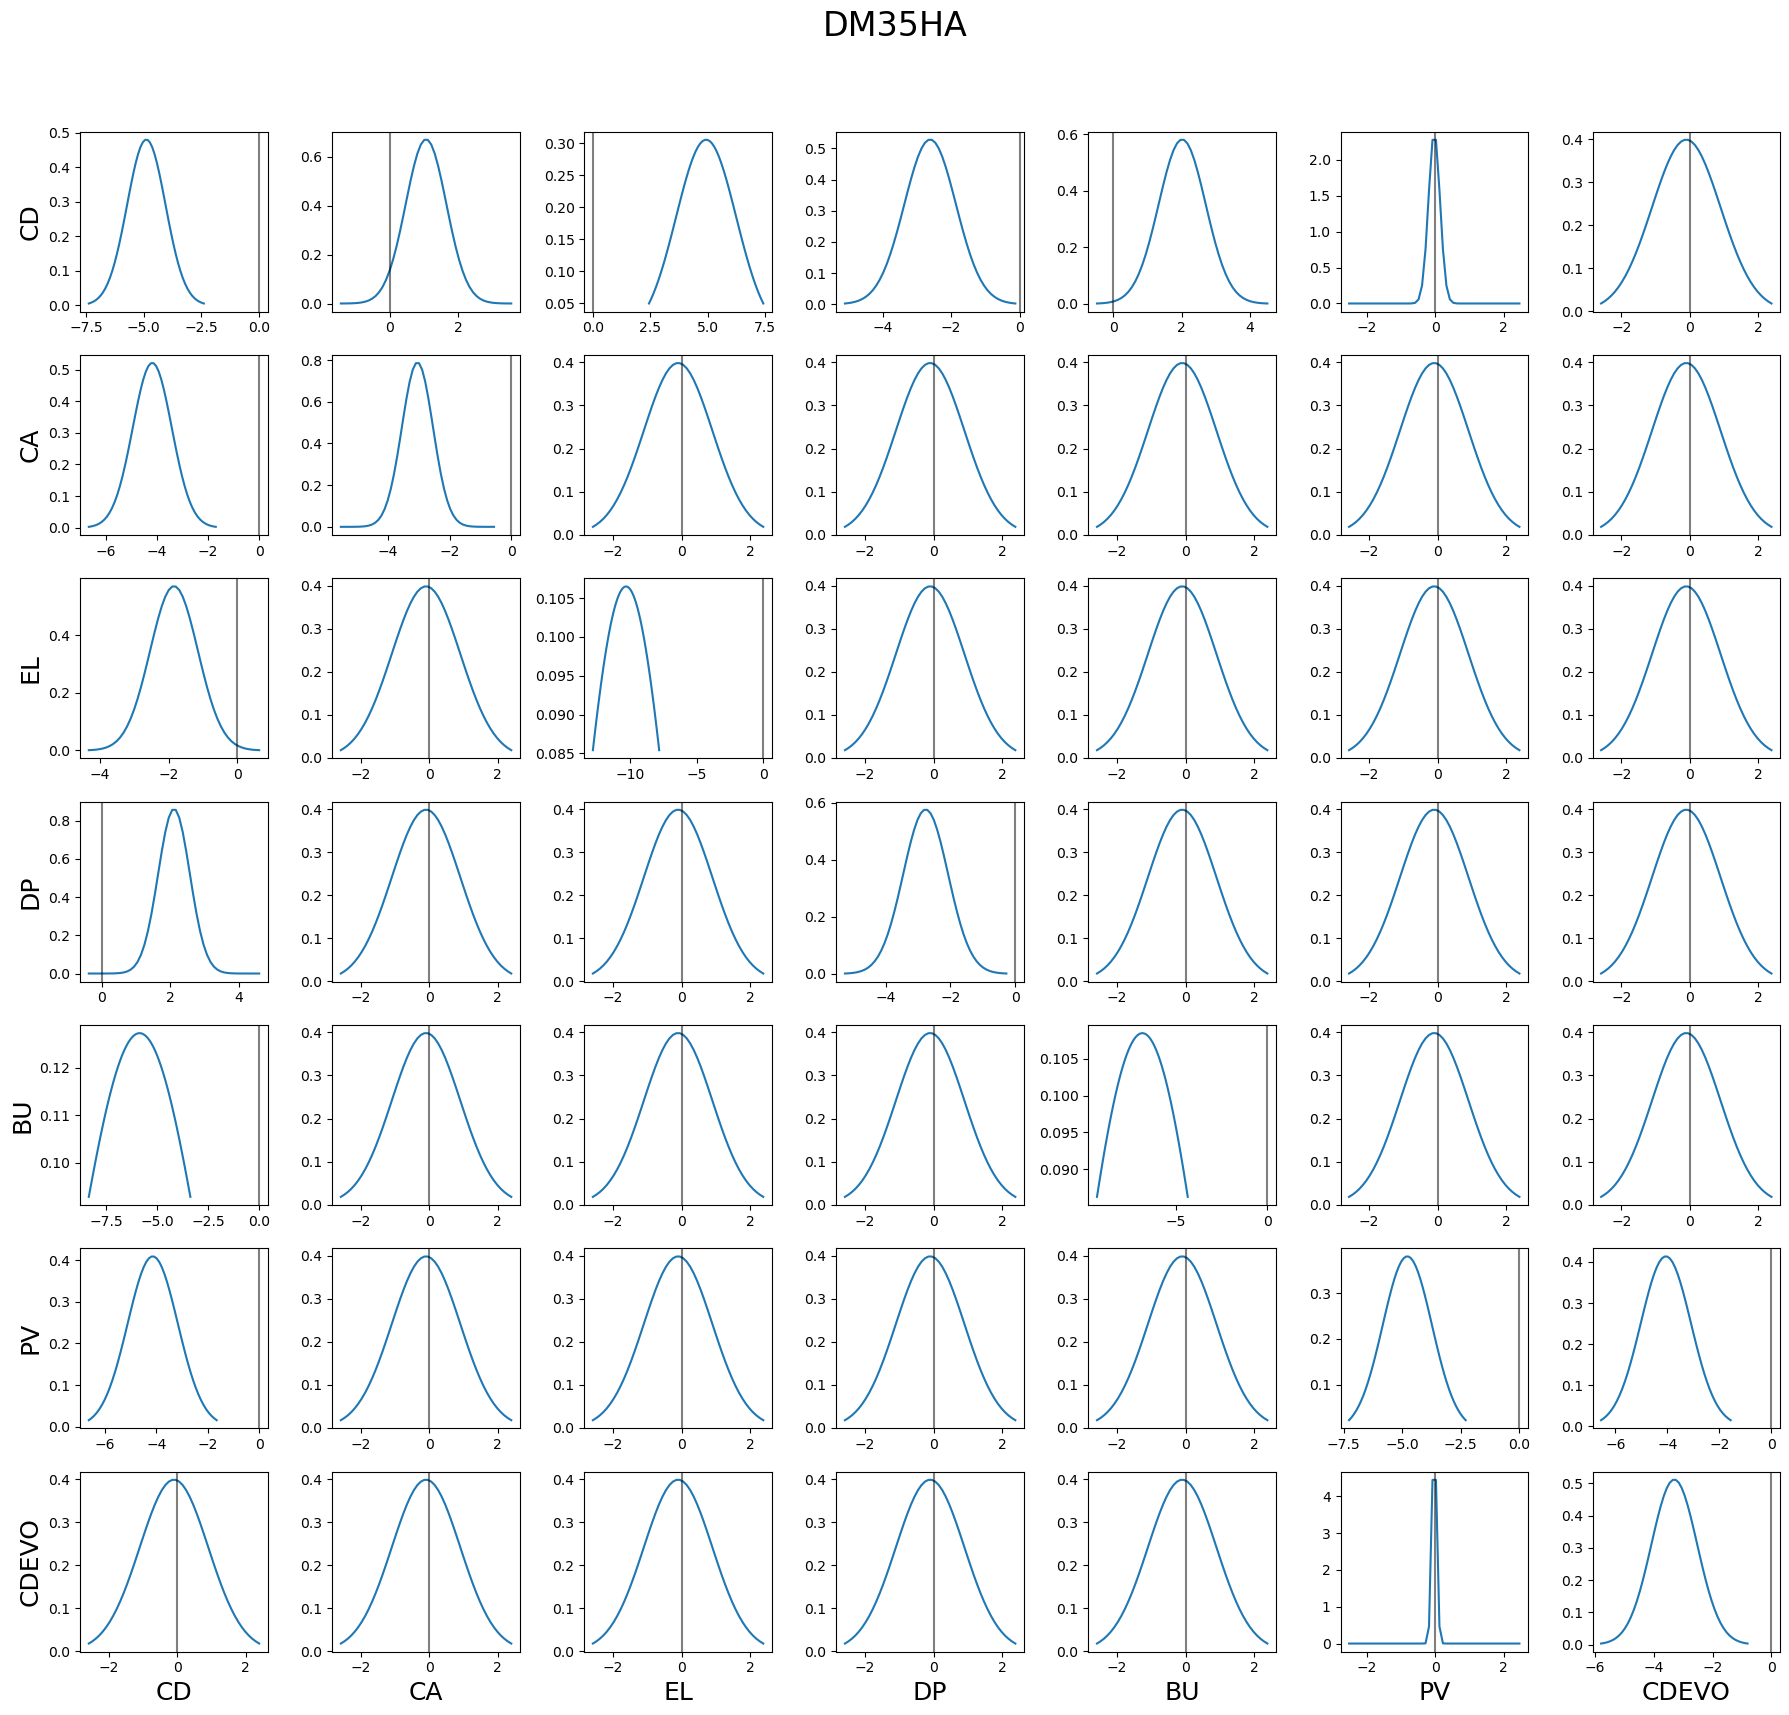

Total samples: 65, Initial regularization: 1.00e-03
Loss: 5.428, Residuals: 0.182
Loss: 4.890, Residuals: -0.025
Loss: 4.082, Residuals: -0.078
Loss: 3.124, Residuals: -0.115
Loss: 3.064, Residuals: -0.058
Loss: 2.950, Residuals: -0.056
Loss: 2.746, Residuals: -0.057
Loss: 2.418, Residuals: -0.057
Loss: 2.278, Residuals: -0.038
Loss: 2.062, Residuals: -0.044
Loss: 2.055, Residuals: -0.017
Loss: 1.993, Residuals: -0.018
Loss: 1.887, Residuals: -0.021
Loss: 1.885, Residuals: -0.016
Loss: 1.883, Residuals: -0.005
Loss: 1.812, Residuals: -0.008
Loss: 1.811, Residuals: -0.006
Loss: 1.777, Residuals: -0.008
Loss: 1.776, Residuals: 0.000
Loss: 1.775, Residuals: 0.005
Loss: 1.738, Residuals: 0.003
Loss: 1.737, Residuals: 0.009
Loss: 1.715, Residuals: 0.008
Loss: 1.715, Residuals: 0.008
Loss: 1.711, Residuals: 0.007
Loss: 1.705, Residuals: 0.007
Loss: 1.705, Residuals: 0.012
Loss: 1.701, Residuals: 0.011
Loss: 1.697, Residuals: 0.004
Loss: 1.697, Residuals: 0.005
Loss: 1.696, Residuals: 0.005
L

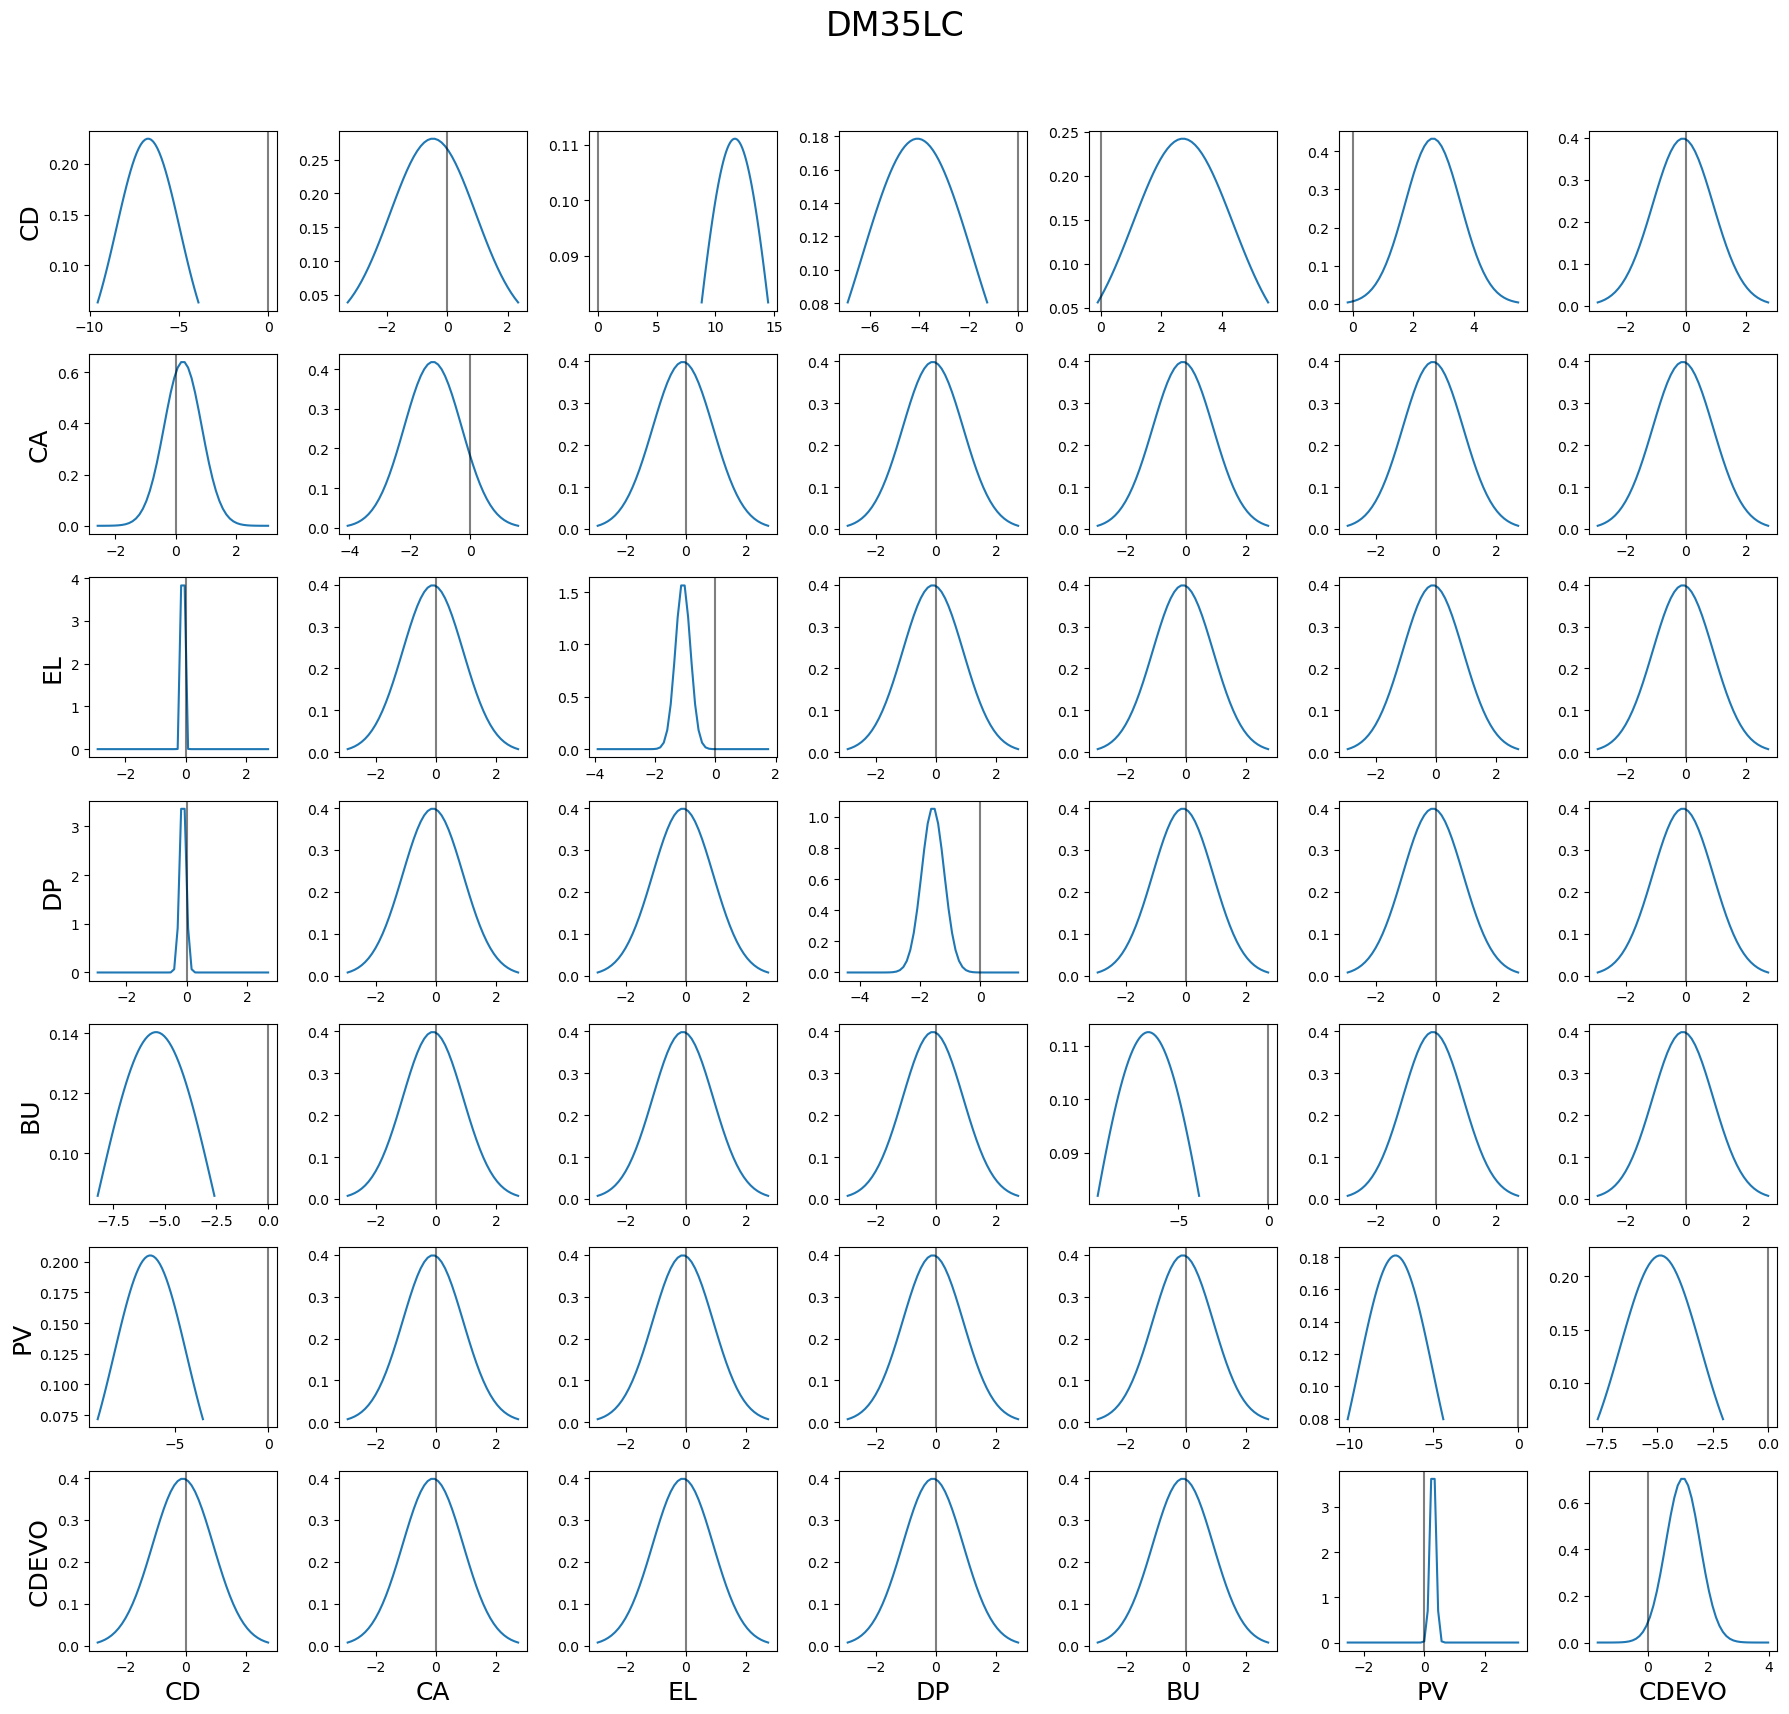

In [2]:
medias = ['DM35', 'DM35HA', 'DM35LC']
for media in medias:
    # import data 
    df = pd.read_csv(f"data/EXP0013_64passages/{media}_fmt.csv")

    # determine species names 
    species = df.columns.values[2:]

    # instantiate gLV fit 
    model = gLV(species, df)

    # fit to data 
    model.fit()

    # list of parameter names 
    param_names = []
    for s1 in species:
        for s2 in species:
            param_names += [s1+"*"+s2]
    param_names = list(species) + param_names

    # plot parameter distribution
    n_species = len(species)
    Avec = model.params[n_species:]
    Aij_std = np.sqrt(np.diag(model.Ainv))[n_species:]

    plt.figure(figsize=(18,18))
    # set counter for parameter std. 
    k = 0

    for i in range(n_species):
        for j in range(n_species):
            plt.subplot(n_species, n_species, k+1)
            a = np.linspace(Avec[k]-np.std(Avec), Avec[k]+np.std(Avec))
            plt.plot(a, norm.pdf(a,Avec[k],Aij_std[k]))
            plt.axvline(x=0, c='k', alpha=.5)
            k += 1
            if j == 0:
                plt.ylabel(species[i], fontsize=18)
            if i == n_species-1:
                plt.xlabel(species[j], fontsize=18)
            #plt.xlim([-2,2])

    plt.suptitle(media, fontsize=24)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.savefig(f"params/p64/P64_{media}.pdf")
    plt.show()
    plt.close()

    # compute Wald test for each parameter
    std_errors = np.sqrt(np.diag(model.Ainv))
    walds = model.params/std_errors
    wald_p_vals = 2*norm.cdf(-np.abs(walds))

    # save to df 
    df = pd.DataFrame()
    df["Param name"] = param_names
    df["Param value"] = model.params
    df["Param stdv"]  = np.sqrt(np.diag(model.Ainv))
    df["Param p-value"] = wald_p_vals
    for j, param_name in enumerate(param_names):
        df[param_name]  = model.Ainv[:, j]
    df.to_csv(f"params/p64/P64_{media}.csv", index=False)